![](img/ppgcc.png)
# Final - Mineração de Dados

In [1]:
# imports

# datetime
import datetime

# logging
import logging

# warnings
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

# numpy
import numpy as np

# pandas
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split, validation_curve, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import scale, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import itertools as its
from sklearn import svm

# graphviz
import graphviz

# scipy
import scipy
from scipy.stats import ttest_rel, wilcoxon

# debug
import pdb

In [2]:
# reads csv file into pandas dataframe
sns.set()

col = ['nivel', 'etapa', 'turno', 'sexo', 'etnia', 'cond_matricula', 'responsavel', 'especial', 'transp_pub', 'status']

# csvfile
csV = '../datasets/Y2_alunos.csv'

# pandasdataframe
df = pd.read_csv(csV, usecols=col, low_memory=False)

In [3]:
# debug
def debug(debug=False):
    """Sets debug mode."""
    
    if debug == True:
        pdb.set_trace()

In [4]:
def confusao(index, con_matrix, tit):
    """Plots confusionx' matrix."""

    df_cm = pd.DataFrame(con_matrix, index=index, columns=index)
    plt.figure(figsize=(8, 4))
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='.2f', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - ' + tit)
    plt.ylabel('output class')
    plt.xlabel('target class')
    plt.xticks(rotation='horizontal')
    plt.yticks(rotation='horizontal')
    plt.savefig('img/con_matrix_' + str(tit) + '.png')
    plt.show()

In [5]:
# tree graph
def arvore(classif, classes, max):
    """Plot decision tree graph."""

    from subprocess import check_call
    export_graphviz(classif, out_file='img/dtree.dot', class_names=classes, max_depth=max, rounded=True)
    check_call(['dot', '-Tpng', 'img/dtree.dot', '-o', 'img/dtree.png'])

In [6]:
# X and Y
size = 0.41
state = 50
max = 4
X = df[['nivel', 'etapa', 'turno', 'sexo', 'etnia', 'cond_matricula', 'responsavel', 'especial', 'transp_pub']]
Y = df['status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=state)

In [7]:
# Decision Tree Fit - dtree
dtree = DecisionTreeClassifier(max_depth=max)
dtree.fit(X_train, Y_train)
predDT = dtree.predict(X_test)

In [8]:
# KNeighbors Fit - knn
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, Y_train)
predKN = knn.predict(X_test)

In [9]:
# Logistic Regression Fit - lreg
lreg = LogisticRegression(class_weight='balanced')
lreg.fit(X_train, Y_train)
predLR = lreg.predict(X_test)

In [10]:
# Naive Bayes Fit - nb
nb = GaussianNB()
nb.fit(X_train, Y_train)
predNB = nb.predict(X_test)

In [11]:
# validação cruzada estratificada
skf = StratifiedKFold(n_splits=10, shuffle=True)

In [12]:
# accuracy
accuDT = accuracy_score(Y_test, predDT)
accuLR = accuracy_score(Y_test, predLR)
accuKN = accuracy_score(Y_test, predKN)
accuNB = accuracy_score(Y_test, predNB)

In [13]:
# confusion matrix
con_matDT = confusion_matrix(Y_test, predDT)
con_matLR = confusion_matrix(Y_test, predLR)
con_matKN = confusion_matrix(Y_test, predKN)
con_matNB = confusion_matrix(Y_test, predNB)

In [14]:
# cross val
scoresDT = cross_val_score(dtree, X_test, Y_test, scoring='accuracy')
scoresLR = cross_val_score(lreg, X_test, Y_test, scoring='accuracy')
scoresKN = cross_val_score(knn, X_test, Y_test, scoring='accuracy')
scoresNB = cross_val_score(nb, X_test, Y_test, scoring='accuracy')

In [15]:
# scores roc curve
scorRocDT = dtree.predict_proba(X_test)[:, 1]
scorRocLR = lreg.decision_function(X_test)
scorRocKN = knn.predict_proba(X_test)[:, 1]
scorRocNB = nb.predict_proba(X_test)[:, 1]

In [16]:
# roc
fprDT, tprDT, _ = roc_curve(Y_test, scorRocDT)
fprLR, tprLR, _ = roc_curve(Y_test, scorRocLR)
fprKN, tprKN, _ = roc_curve(Y_test, scorRocKN)
fprNB, tprNB, _ = roc_curve(Y_test, scorRocNB)

In [17]:
# auc
aucDT = auc(fprDT, tprDT)
aucLR = auc(fprLR, tprLR)
aucKN = auc(fprKN, tprKN)
aucNB = auc(fprNB, tprNB)

In [18]:
print('# ================================================================ #')
print('Classifier        Scores                 Mean     Std        Var')
print('Decision Tree:   ', np.around(scoresDT, decimals=2), "{:10.2f}".format(scoresDT.mean()), "{:10.4f}".format(np.std(scoresDT)),"{:10.4f}".format(np.var(scoresDT), "{:10.2f}".format(accuDT)))
print('Log. Regression: ', np.around(scoresLR, decimals=2), "{:10.2f}".format(scoresLR.mean()), "{:10.4f}".format(np.std(scoresLR)),"{:10.4f}".format(np.var(scoresLR), "{:10.2f}".format(accuLR)))
print('KNeighbors:      ', np.around(scoresKN, decimals=2), "{:10.2f}".format(scoresKN.mean()), "{:10.4f}".format(np.std(scoresKN)),"{:10.4f}".format(np.var(scoresKN), "{:10.2f}".format(accuKN)))
print('Naive Bayes:     ', np.around(scoresNB, decimals=2), "{:10.2f}".format(scoresNB.mean()), "{:10.4f}".format(np.std(scoresNB)),"{:10.4f}".format(np.var(scoresNB), "{:10.2f}".format(accuNB)))
print('# ================================================================ #')
print('ttest Decision Tree x KNN')
print("{:10.2f}".format(ttest_rel(scoresDT, scoresKN).pvalue))
print('# ================================================================ #')
wil = wilcoxon(scoresDT, scoresKN)
print('Wilcoxon')
print("{:10.2f}".format(wil.pvalue))
print('# ================================================================ #')
print('Acurácia:')
print("Decision Tree:       ", "{:10.2f}".format(accuDT))
print("Logistic Regression: ", "{:10.2f}".format(accuLR))
print("KNeighbors:          ", "{:10.2f}".format(accuKN))
print("Naive Bayes:         ", "{:10.2f}".format(accuNB))
print('# ================================================================ #')

# ================================================================ #
Classifier        Scores                 Mean     Std        Var
Decision Tree:    [0.54 0.56 0.6 ]       0.57     0.0240     0.0006
Log. Regression:  [0.57 0.59 0.59]       0.58     0.0087     0.0001
KNeighbors:       [0.62 0.63 0.63]       0.63     0.0076     0.0001
Naive Bayes:      [0.58 0.53 0.54]       0.55     0.0241     0.0006
# ================================================================ #
ttest Decision Tree x KNN
      0.05
# ================================================================ #
Wilcoxon
      0.11
# ================================================================ #
Acurácia:
Decision Tree:              0.57
Logistic Regression:        0.57
KNeighbors:                 0.62
Naive Bayes:                0.56
# ================================================================ #


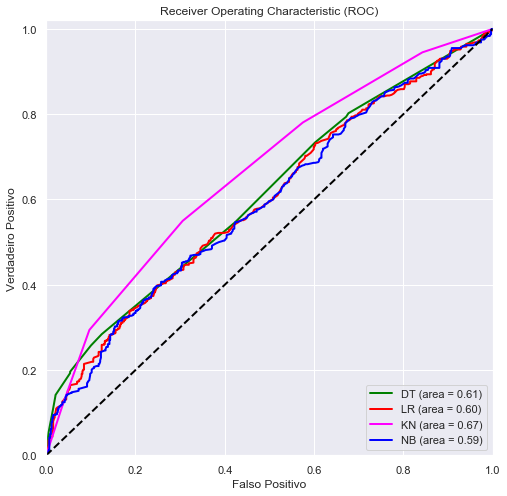

In [19]:
# plot roc curve
plt.figure(figsize=(8, 8))
plt.plot(fprDT, tprDT, color='green', lw=2, label='DT (area = %0.2f)' % aucDT)
plt.plot(fprLR, tprLR, color='red', lw=2, label='LR (area = %0.2f)' % aucLR)
plt.plot(fprKN, tprKN, color='magenta', lw=2, label='KN (area = %0.2f)' % aucKN)
plt.plot(fprNB, tprNB, color='blue', lw=2, label='NB (area = %0.2f)' % aucNB)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('img/curva_roc.png')
plt.show()

![](img/dtree.png)